### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

Вызовем Pandas, загрузим таблицу. Чтобы разделять колонки в таблице используем параметр разделения колонок sep = '\t'

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")

In [4]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

Посмотрим на первые пять строк таблицы. У нас имеется архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим на общую информицию о таблице. Изучим столбцы.
total_images - число фотографий квартиры в объявлении.
last_price  - цена на момент снятия с публикации.
total_area - общая площадь квартиры в м.кв.
first_day_exposition - дата публикации. Видим, что тип у этого столбца = object, значит нужно перевести его в формат Datetime.
rooms - число комнат.
ceiling_height - высота полотков в метрах.
floors_total - всего этажей в доме. Видим, что тип у этого столбца = float64, переведем его в тип int64, так как обычно этажи                  это целое число.
is_apartment - апартаменты. Видим, что тип у этого столбца = object, переведем его в тип bool (так как студии в этом типе, пока                предположим, что и в этом столбце будут значения 1 и 0.
studio - квартира-студия.
open_plan - квартиры со свободной планировкой.
kitchen_area - площадь кухни м.кв.
balcony - число балконов. Видим, что тип у этого столбца = float64, переведем его в тип int64, так как обычно балконы                 это целое число.
locality_name - название населенного пункта.
airports_nearest - расстояние до ближайшего аэропорта в метрах.
cityCenters_nearest - расстояние до центра города в метрах.
parks_around3000 - расстояние до ближайшего парка в метрах.
ponds_around3000 - число водоемов в радиусе трех км. Видим, что тип у этого столбца = float64, переведем его в тип int64, так  
                   как обычно число водоемов это целое число.
ponds_nearest - расстояние до ближайшего водоема в метрах.
days_exposition - количество дней публикации обЪявления. Видим, что тип у этого столбца = float64, переведем его в тип int64,                     так как обычно количество дней это целое число.

На этапе знакомства с данными у нас появились предположения, как можно улучшить данные таблицы. Посмотрим как выглядят данные на гистограмме.

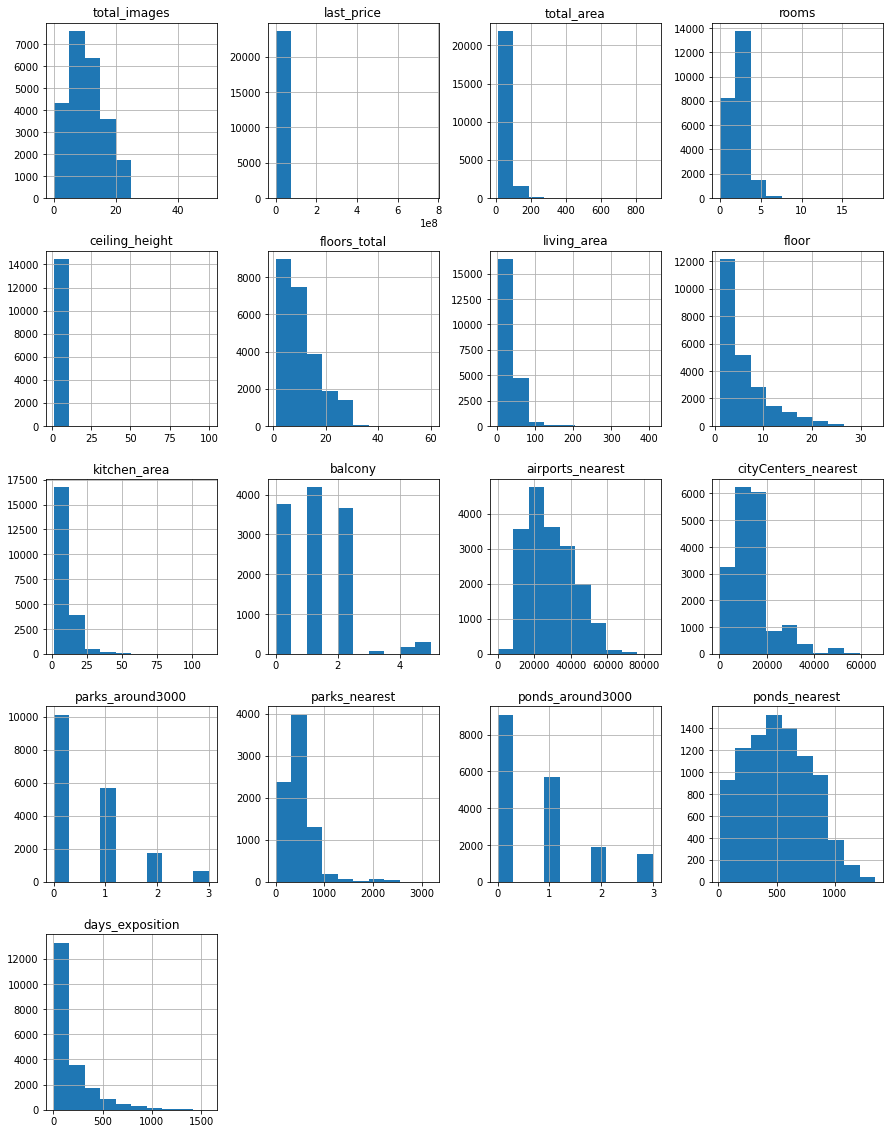

In [6]:
data.hist(figsize=(15,20))
plt.show()

total_images - мы видим нормальное распределение. Фотографий примерно от 0 до 20. Самое большое количество обЪявлений
           содержит от 7-14 фотографий примерно. Пока нас ничего не настораживает.
last_price - не совсем понятно, что показано на графике. Стоит задуматься и проверить значения этого столбца.
total_area - основная масса объявлений лежит в диапазоне от 0 до 200 метров. В этом столбце нужно проверить метраж самых 
             больших и маленьких квартир. И отбросить аномально большие значения, так как они будут искажать результаты.
rooms - количество комнат варьирует от 0 и до 7. 0 скорее всего это студии. Посмотрим на строки с большим количеством комнат, если их мало, уберем, так как они сильно будут искажать результаты исследования.
ceiling_height - у некоторых квартир высота потолков достигает 10 метнов посмотрим значения этого столбца.
floors_total, living_area - не вызывает вопросов, при небольших значениях распределение смещено влево, с увеличением значения
       вправо.
floor - количество квартир на самы высоких этажах, от 10 и выше очень маленькое. Может стоит в дальнейшем объединить их в одну
       группу
kitchen_area - стоить аномально большой метраж кухнонь и убрать эти значения, так как они будут искажать результаты.
balcony - посторим на квартиры с балконами больше 4 шт, уберем, если их количество минимально.
airports_nearest, cityCenters_nearest, parks_around3000,parks_nearest,ponds_nearest, days_exposition - не вызывает вопросов, при небольших значениях распределение смещено влево, с увеличением значения вправо.
ponds_nearest - мы видим нормальное распределение.

В этой части исследования мы открыли файл, познакомились с данными таблицы и наметили изменения, которые будем выполнять с данными во второй часои исследования.

### Предобработка данных

В предыдущей части мы познакомились с данными и наметили первые вопросы и необходимость предобработки данных. Чем мы и займемся в этой части исследования.

Для начала определим в каких столбцах есть пропуски. Выведем количество пропущенных значений для каждого столбца 
используя методы isna() и sum()

In [7]:
data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
total_images,0.00%
open_plan,0.00%
floor,0.00%
rooms,0.00%
studio,0.00%
total_area,0.00%
last_price,0.00%
first_day_exposition,0.00%
locality_name,0.21%
floors_total,0.36%


Мы видим огромное количество пропущенных значений. 
Будем действовать попорядку.
В столбце ceiling_height  высота пололков заполним медианным значением. Посмотрим сначала уникальные значения.

In [8]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Поищем явные дубликаты

In [9]:
data.duplicated().sum()

0

Для начала заменим значения 27,26 и т.д на более подходящие к примеру 25 можно предположить, что потеряна запятая 2,5

In [10]:
data['ceiling_height']= data['ceiling_height'].replace({27.5:2.75, 32.:3.2, 27.:2.7, 26.:2.6, 22.6:2.6, 24.:2.4, 25.:2.5, 20.:2.0,})


Найдем медиану по столбцу 'ceiling_height' и заменим нулевые значения значением медианы

In [11]:
data['ceiling_height'].median()
    

2.65

In [12]:
data['ceiling_height']= data['ceiling_height'].fillna(2.65)

In [13]:

data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,   2.58,   3.7 ,
         2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,   3.6 ,
         2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,   3.62,
         3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,   2.79,
         2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,   4.7 ,
         2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,   3.35,
         2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,   3.83,
         3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,   3.85,
         3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,   3.08,
         3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,   3.34,   2.81,
      

Заменим типы в столбцах, что нашли в процессе изучения данных:

Подумаем, почему появляются пропуски в данных. Все объявления разные, кто-то не считал расстояние до центра, ктоло не знает о наличии парков около квариры. Ктоло по ошибке или невнимательности не указал какую-то информацию. Может при переносе данных и формировании базы потерялись какие-либо значения. Отсутствие балкона может быть пустым значением и при замене nan на 0 пропуски уйдут. То же самое со значениями в булевых типах строк.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')  #переведем в тип Datetime
data['floors_total'] = data['floors_total'].fillna(0).astype(int) #переведем в тип int64.
data['is_apartment'] = data['is_apartment'].fillna(False) #заменим значения nan на 0, предположив, что 0 это не апартаменты, 1 апартаменты  
data['balcony'] = data['balcony'].fillna(0).astype(int) #переведем в тип int64.
data['ponds_around3000'] = data['ponds_around3000'].fillna(9999).astype(int)   #переведем в тип int64.
data['days_exposition'] = data['days_exposition'].fillna(0).astype(int)   #переведем в тип int64.   
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Заменим пустые значения жилой площади и площади кухни

In [15]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

Заменим пустые значения в  столбцах на no_data


In [16]:
data['parks_around3000'] = data['parks_around3000'].fillna(value = 'no_data')
data['ponds_around3000'] = data['ponds_around3000'].fillna(value = 'no_data')
data['locality_name'] = data['locality_name'].fillna(value = 'no_data')

data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

Поищем неявные дубликаты в столбце locality_name 

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Данных очень много. На первый взгляд видны совпадения с буквами е и ё. Так же есть совпадения с "поселок городского типа " и "городской поселок". Заменим ё на е, поселок Рябово на поселок городского типа Рябово и городской поселок на поселок городского типа.

In [8]:
to_replace = {'ё':'е', \
              'поселок городского типа':'поселок', \
              'городской поселок':'поселок'
             }
data['locality_name'] = data['locality_name'].replace(to_replace, regex=True)


data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок Кузьмоловский', 'садовое товарищество Новая Ропша',
       'Павловск', 'деревня Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'деревня Куттузи',
       'поселок Аннино', 'поселок Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Ш

Найдем и устраним редкие и выбивающиеся значения. Ранее мы уже заменили аномалии в столбце 'ceiling_height', логично предположив, что значения 25,23 и тд на самом деле это вещественные значения 2,5, 2,3 и тд соответственно. На данном этапе мы убираем редкие и выбивающиеся значения.
Изучив уникальные значения столбца 'ceiling_height' мы увидели, что потолки могут быть очень низкими и очень высокими, приняв эти значения за ошибочные мы поставили условие, что потоли нас интересую в диапазоне от 3-5 метров.
Изучит данные по столбцу 'floors_total' мы увидели, что в данных есть нулевые значения, не бывает нулевая этажность. Значит будем рассматривать квартиры в домах, где от 1 этажа и выше.
Изучив данные по столбцу 'kitchen_area' мы увидели аномально маленькие и аномально большие кухни, не может быть кухня 1 кв.м, поставим за минимальную площадь кухни 3 кв.м, а максимальную 30 кв.м.
Ограничим также данные по жилым площадям и по общей площади квартиры.

In [20]:
data = data.loc[(data['ceiling_height'] <=5) & (data['ceiling_height'] >=2)] 

data = data.loc[(data['kitchen_area'] <=30) & (data['kitchen_area'] >=3)] 
data = data.loc[(data['living_area'] <=200) & (data['living_area'] >=10)]
data = data.loc[(data['total_area'] <=200) & (data['total_area'] >=15)]


In [21]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23144.000000,2.314400e+04,23144.000000,23144.000000,23144.000000,23144.000000,23144.000000,23144.000000,23144.000000,23144.000000,17629.000000,17649.000000,7744.000000,23144.000000,8758.000000,23144.000000
mean,9.799473,5.815901e+06,57.452250,2.025622,2.689377,10.679226,33.078400,5.896474,9.942886,0.593329,28820.764422,14358.011502,492.367123,2374.173349,521.851108,155.134160
std,5.648983,5.003905e+06,25.358682,0.990509,0.203918,6.626571,16.949959,4.892960,4.138059,0.957698,12717.573714,8593.763963,340.895217,4254.135687,276.898305,210.949824
min,0.000000,4.300000e+05,17.000000,0.000000,2.000000,0.000000,10.000000,1.000000,3.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18475.000000,9556.000000,288.000000,0.000000,303.000000,23.000000
50%,9.000000,4.600000e+06,51.200000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26791.000000,13216.000000,456.000000,1.000000,506.000000,73.000000
75%,14.000000,6.582500e+06,68.000000,3.000000,2.700000,16.000000,41.900000,8.000000,11.600000,1.000000,37407.000000,16399.000000,613.000000,3.000000,733.000000,197.000000
max,50.000000,1.240000e+08,200.000000,11.000000,5.000000,60.000000,164.700000,33.000000,30.000000,5.000000,84869.000000,65968.000000,3190.000000,9999.000000,1344.000000,1580.000000


In [22]:
data['floors_total']= data['floors_total'].replace({0:1})

Скорее всего 0 этажей это дома без этажности (то есть одноэтажные дома в деревнях), заменим 0 на 1. Так как фактически 1 этаж все-таки есть.

В этой части исследования мы более подробно изучили данные. Нашли пропуски в столбцах и заменили их либо медианным значением, либо значением NO-DATA. Поменяли в некоторых столбцах там где это необходимо,типы данных. Изучили уникальные значения в столбце с названиями и устранили неявные дубликаты. Нашли и устранили редкие и выбивающиеся значения, обработали аномалии и удалили то, что не получилось обработать.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим в таблицу и посчитаем столбец цена одного квадратного метра 'price_sq_m'

In [27]:
data['price_sq_m'] = data['last_price']/data['total_area']


Добавим в таблицу и посчитаем столбец день публикации объявления day_publication

In [28]:
data['day_publication'] = data['first_day_exposition'].dt.weekday

Добавим в таблицу и посчитаем столбец месяц публикации объявления month_publication

In [29]:
data['month_publication'] = data['first_day_exposition'].dt.month

Добавим в таблицу и посчитаем столбец год публикации объявления year_publication

In [30]:
data['year_publication'] = data['first_day_exposition'].dt.year

Посчитаем и добавим в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)

In [31]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'средний'
data['floor_type'] = data.apply(floor_group, axis=1)


Посчитаем и добавим в таблицу: расстояние в км до центра города. 

In [32]:
data['center_km'] = data['cityCenters_nearest'] / 1000
data['center_km'] = data['center_km'].fillna(value=0).astype(int)

Посмотрим, что получилось

In [33]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,day_publication,month_publication,year_publication,floor_type,center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,0,120370.370370,3,3,2019,средний,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,0,NaN,81,82920.792079,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2,574.0,558,92785.714286,3,8,2015,средний,13
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.785766,9,False,...,84.0,3,234.0,424,408176.100629,4,7,2015,средний,6
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.400000,5,False,...,NaN,9999,NaN,55,95065.789474,0,9,2018,средний,0


In [34]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,cityCenters_nearest,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,day_publication,month_publication,year_publication,center_km
count,23144.000000,2.314400e+04,23144.000000,23144.000000,23144.000000,23144.000000,23144.000000,23144.000000,23144.000000,23144.000000,...,17649.000000,7744.000000,23144.000000,8758.000000,23144.000000,23144.000000,23144.000000,23144.000000,23144.000000,23144.000000
mean,9.799473,5.815901e+06,57.452250,2.025622,2.689377,10.682855,33.078400,5.896474,9.942886,0.593329,...,14358.011502,492.367123,2374.173349,521.851108,155.134160,97337.585608,2.571552,6.405159,2017.372191,10.570472
std,5.648983,5.003905e+06,25.358682,0.990509,0.203918,6.620992,16.949959,4.892960,4.138059,0.957698,...,8593.763963,340.895217,4254.135687,276.898305,210.949824,41220.468630,1.790423,3.490952,1.034803,9.546718
min,0.000000,4.300000e+05,17.000000,0.000000,2.000000,1.000000,10.000000,1.000000,3.000000,0.000000,...,181.000000,1.000000,0.000000,13.000000,0.000000,7962.962963,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,...,9556.000000,288.000000,0.000000,303.000000,23.000000,76158.351205,1.000000,3.000000,2017.000000,2.000000
50%,9.000000,4.600000e+06,51.200000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,13216.000000,456.000000,1.000000,506.000000,73.000000,94500.506497,3.000000,6.000000,2017.000000,11.000000
75%,14.000000,6.582500e+06,68.000000,3.000000,2.700000,16.000000,41.900000,8.000000,11.600000,1.000000,...,16399.000000,613.000000,3.000000,733.000000,197.000000,113207.547170,4.000000,10.000000,2018.000000,15.000000
max,50.000000,1.240000e+08,200.000000,11.000000,5.000000,60.000000,164.700000,33.000000,30.000000,5.000000,...,65968.000000,3190.000000,9999.000000,1344.000000,1580.000000,995983.935743,6.000000,12.000000,2019.000000,65.000000


Выводы:
Новые параметры посчитаны на основе имевшихся ранее данных и помогут детальнее рассмотреть информацию об объектах. 

### Проведите исследовательский анализ данных

Изучение общих параметров

Общая площадь

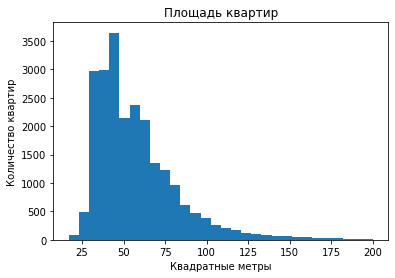

In [35]:
plt.hist(data['total_area'], bins=30)
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()



Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. В подборке есть несколько очень больших и странных вариантов с площадью более 200 квадратных метров. Ранее мы установили параметр площади не больше 200 метров. Будем считать что такие квартиры есть, но мало.

Жилая площадь

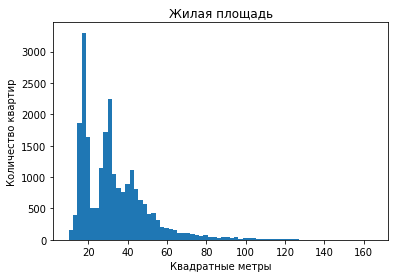

In [36]:
plt.hist(data['living_area'], bins=70)
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()



Большинство квартир с жилой площадью от 15-25 квадратных метров. Мы убирали аномально большие и аномально маленькие значения. Но все равно тяжело представить квартиры с жилой площадью 10 метров. Возможно это квартиры студии.

Площадь кухни

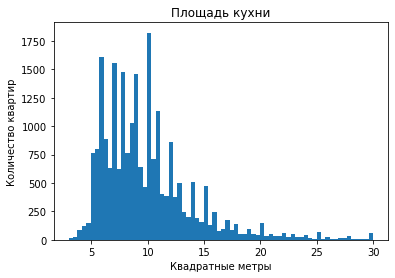

In [37]:
plt.hist(data['kitchen_area'], bins=70)
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()


Цена обекта

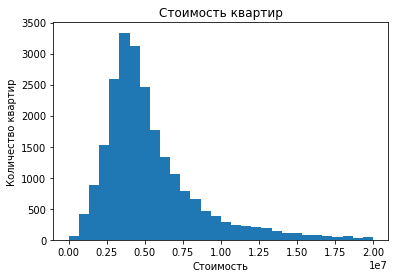

In [38]:
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир стоят в районе 3-4 миллионов. Присутствует некоторое количество квартир с аномально низкой стоимостью.

Количество комнат

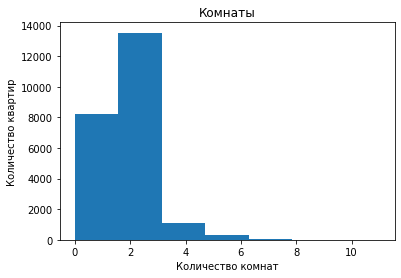

In [39]:
plt.hist(data['rooms'], bins=7)
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир имеют от нуля до трех комнат. Студии, вероятно, имеют 0 количество комнат.

Высота потолков

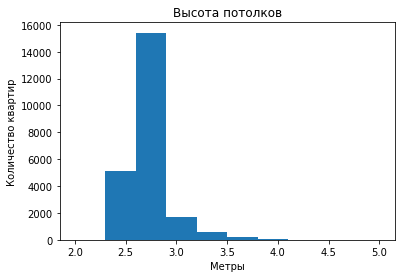

In [40]:
plt.hist(data['ceiling_height'])
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Высота потолков в большинстве квартир 2,2-2,8 метра. 

Этаж квартиры

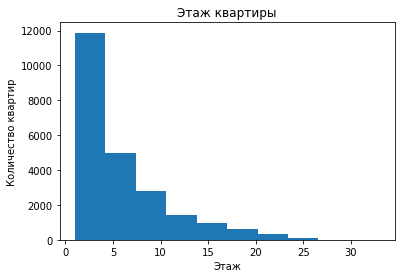

In [41]:
plt.hist(data['floor'])
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир располагаются на 1-5 этажах

Тип этажа квартиры

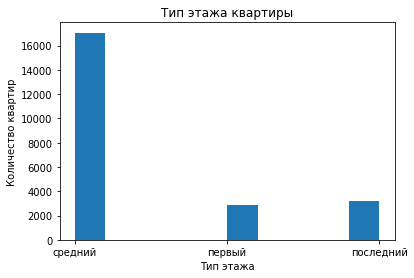

In [42]:
plt.hist(data['floor_type'])
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

Квартир на первом и последнем этаже примерно одинаково

Общее количество этажей в доме

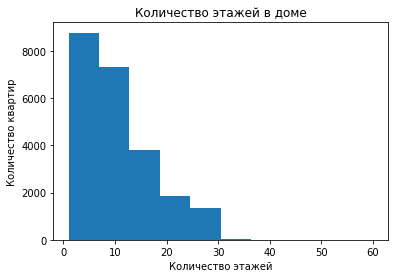

In [43]:
plt.hist(data['floors_total'])
plt.title('Количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир располагаются в домах с низкой этажностью. Скорее всего это связанно с тем, что большинство квартир находятся за пределами центральных городов.

Расстояние до центра города в метрах

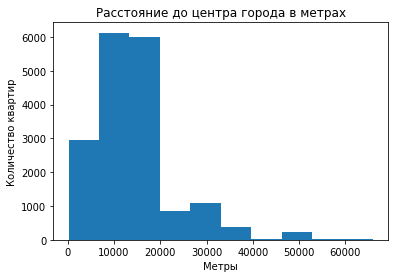

In [44]:
plt.hist(data['cityCenters_nearest'])
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир располагается на расстоянии до 10 км от центра города. Есть квартиры и за 60 км от центра

Расстояние до ближайшего аэропорта

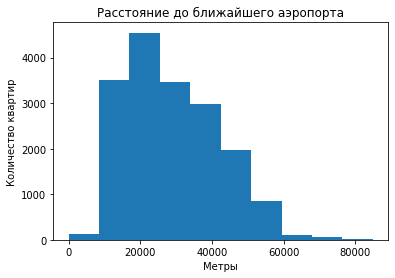

In [45]:
plt.hist(data['airports_nearest'])
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Расстояние до ближайшего парка

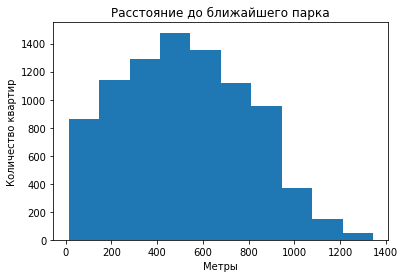

In [46]:
plt.hist(data['ponds_nearest'])
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир находятся недалеко от парков, а дальние расстояния это скорее всего загород.

День публикации объявления

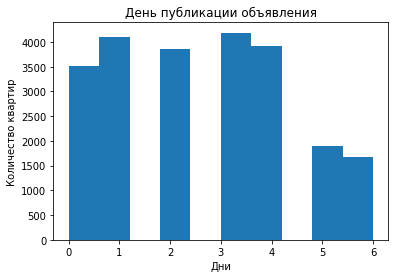

In [47]:
plt.hist(data['day_publication'])
plt.title('День публикации объявления')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

Большинство объявлений опубликовано в будние дни.

Месяц публикации объявления

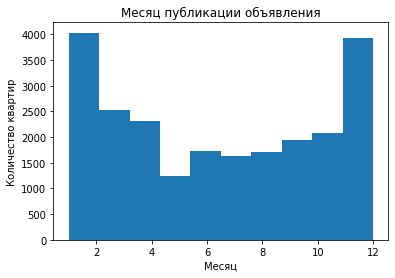

In [48]:
plt.hist(data['month_publication'])
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Публикации распределены по году практически равномерно. Больше всего публикаций приходится на зимние месяцы. Спад виден в мае, видимо за счет праздничного периода.

### Изучение времени продажи квартиры

Посчитаем среднее и медиану.

In [49]:
print('Время продажи (медиана):', data.query('days_exposition != 0')['days_exposition'].median())
print('Время продажи (среднее):', data.query('days_exposition != 0')['days_exposition'].mean())

Время продажи (медиана): 94.0
Время продажи (среднее): 178.6903399193749


Построим гистограмму

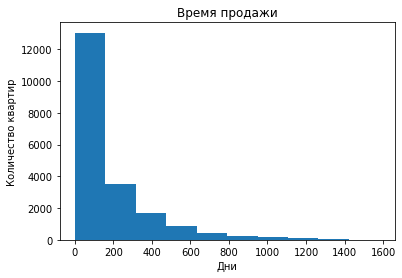

In [50]:
plt.hist(data.query('days_exposition != 0')['days_exposition'])
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

In [51]:
data.query('days_exposition != 0')['days_exposition'].describe()

count    20093.000000
mean       178.690340
std        216.904868
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время продажи 178 дней. Медианное время продажи 94 дня. Некоторые квартиры продавались сразу после публикации,  а некоторые квартиры  "висели" в публикации до четырех лет. 
Быстрыми продажами можно считать квартиры, которые продавались в течение 45 дней. Медленными - 228 дней.

###  Изучение влияния определенных факторов на цену

1.Зависимость цены от общей площади

In [52]:
data.pivot_table(index='total_area', values='last_price')


,last_price
total_area,
17.00,1900000.0
17.60,3400000.0
17.78,1737000.0
18.00,1515000.0
18.50,1500000.0
...,...
197.90,32238780.0
198.00,30489500.0
198.10,20000000.0


In [53]:
data.pivot_table(index='floor_type', values=['total_area', 'last_price']).corr()    

,last_price,total_area
last_price,1.000000,0.804021
total_area,0.804021,1.000000


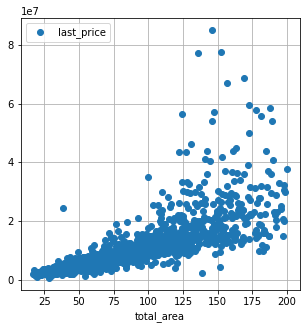

In [54]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()


Чем больше общая площадь, тем выше стоимость.

2.Зависимость цены от жилой площади

In [55]:
data['last_price']=data['last_price']/1000

In [56]:
data.pivot_table(index='living_area', values='last_price')

,last_price
living_area,
10.000000,3544.759533
10.080000,3250.000000
10.277634,1200.000000
10.300000,6050.000000
10.400000,3941.666667
...,...
147.000000,34979.000000
147.200000,20295.200000
150.800000,19500.000000


In [57]:
data.pivot_table(index='floor_type', values=['living_area', 'last_price']).corr()    

,last_price,living_area
last_price,1.000000,0.122342
living_area,0.122342,1.000000


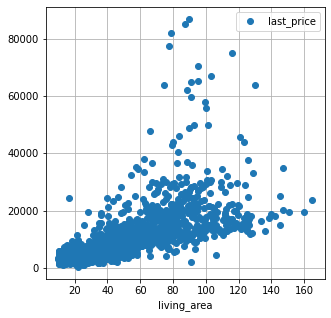

In [58]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()

По графику видим, что тут тоже прямая корреляция. От возрастания жилой площади растет цена квартиры.

3. Зависимость цены и площади кухни

In [59]:
data.pivot_table(index='kitchen_area', values='last_price')

,last_price
kitchen_area,
3.000000,2735.714286
3.082564,3400.000000
3.114091,1737.000000
3.152623,1763.333333
3.200000,6000.000000
...,...
29.700000,5886.750000
29.774770,19095.000000
29.800000,7000.000000


In [60]:
data.pivot_table(index='floor_type', values=['kitchen_area', 'last_price']).corr()    

,kitchen_area,last_price
kitchen_area,1.000000,0.982511
last_price,0.982511,1.000000


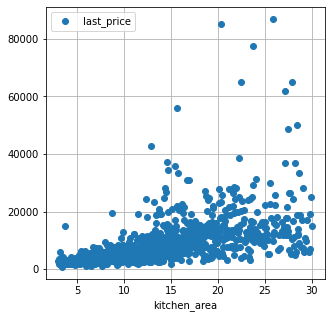

In [61]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()

Здесь тоже видим прямую зависимость. Видимо любое увеличение площади ведет за собой увеличение цены.

4. Зависимость цены от количества комнат

In [62]:
data.pivot_table(index='rooms', values='last_price')

,last_price
rooms,
0,2985.640263
1,3819.368962
2,5446.729483
3,7647.416671
4,11195.132654
5,14693.015189
6,16021.740351
7,18682.000000
8,19145.000000


In [63]:
data.pivot_table(index='rooms', values=['kitchen_area', 'last_price']).corr()    

,kitchen_area,last_price
kitchen_area,1.000000,0.487158
last_price,0.487158,1.000000


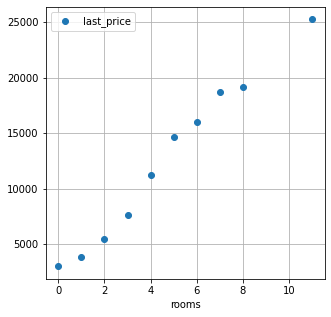

In [64]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()

Самая низкая цена у студий. С возрастание количества комнат цена растет.

5. Зависимость цены от типа этажа

In [65]:
data.pivot_table(index='floor_type', values='last_price')

,last_price
floor_type,
первый,4541.598371
последний,5531.420814
средний,6084.045497


In [66]:
data.pivot_table(index='rooms', values=['floor_type', 'last_price']).corr()    

,last_price
last_price,1.0


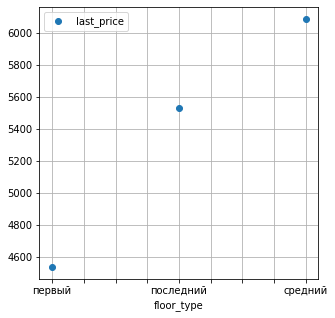

In [67]:
data.pivot_table(index='floor_type', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()

Самые дешевые квартиры на первом этаже. Квартиры на средних этажах дороже, чем на последних.

6. Зависимость цены квартиры от дня недели размещения объявления

In [68]:
data.pivot_table(index='day_publication', values='last_price')

,last_price
day_publication,
0,5806.051183
1,5823.659762
2,5811.762525
3,6028.061538
4,5698.781683
5,5755.429097
6,5638.138901


In [69]:
data.pivot_table(index='rooms', values=['day_publication', 'last_price']).corr()    

,day_publication,last_price
day_publication,1.000000,0.051608
last_price,0.051608,1.000000


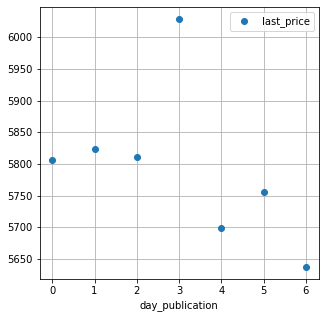

In [70]:
data.pivot_table(index='day_publication', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()

In [71]:
data.pivot_table(index='month_publication', values='last_price')

,last_price
month_publication,
1,5740.968402
2,5854.234743
3,5696.317798
4,5716.818210
5,5808.615284
6,5723.253666
7,5752.754586
8,5955.412905
9,5963.628760


In [72]:
data.pivot_table(index='rooms', values=['month_publication', 'last_price']).corr()    

,last_price,month_publication
last_price,1.000000,-0.193618
month_publication,-0.193618,1.000000


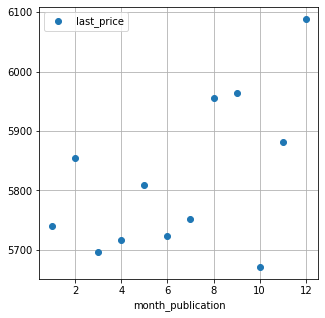

In [73]:
data.pivot_table(index='month_publication', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()

In [74]:
data.pivot_table(index='year_publication', values='last_price')

,last_price
year_publication,
2014,10548.756992
2015,6959.898106
2016,5968.381708
2017,5733.410697
2018,5509.963431
2019,6140.134610


In [75]:
data.pivot_table(index='rooms', values=['year_publication', 'last_price']).corr()   

,last_price,year_publication
last_price,1.000000,0.255397
year_publication,0.255397,1.000000


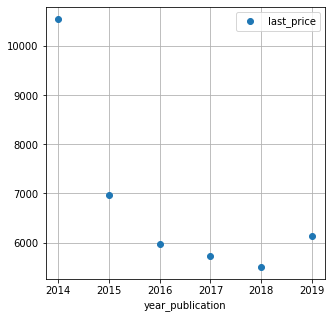

In [76]:
data.pivot_table(index='year_publication', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()

День недели, месяц и год не имеют большого влияния на цену квартиры. 

### Рассчет средней цены одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений

In [77]:
city_sm_price = data.pivot_table(values='price_sq_m', index='locality_name', aggfunc =['count', 'mean'])
city_sm_price.columns = ['count','price_sq_m'] 
city_sm_price

,count,price_sq_m
locality_name,,
no_data,48,94274.161610
Бокситогорск,16,17551.591819
Волосово,36,40183.325974
Волхов,111,35087.679877
Всеволожск,397,68614.270181
...,...,...
село Путилово,2,39921.758208
село Рождествено,3,37733.159586
село Русско-Высоцкое,9,54833.726028


In [78]:
city_sm_price.sort_values('price_sq_m', ascending=False)

,count,price_sq_m
locality_name,,
Зеленогорск,24,115122.799198
Санкт-Петербург,15214,112155.524483
поселок Репино,4,104238.614786
Пушкин,357,102708.990895
Сестрорецк,178,102011.619333
...,...,...
поселок Совхозный,2,12629.129129
деревня Выскатка,2,12335.480902
деревня Вахнова Кара,1,11688.311688


Самая высокая стоимость квадратного метра в Зеленогорске, самая низкая в деревне Старополье.

In [79]:
city_sm_price.sort_values('count', ascending=False).head(10)

,count,price_sq_m
locality_name,,
Санкт-Петербург,15214,112155.524483
поселок Мурино,553,85654.245117
поселок Шушары,437,78732.831279
Всеволожск,397,68614.270181
Пушкин,357,102708.990895
Колпино,337,75333.295801
поселок Парголово,326,90332.263023
Гатчина,306,68676.457955
деревня Кудрово,298,92542.250756


В десяти населенных пунктах с  наибольшим числом объявлений самый дорогой квадратный метр жилья в Санкт-Петербурге, самый дешевый в Выборге.

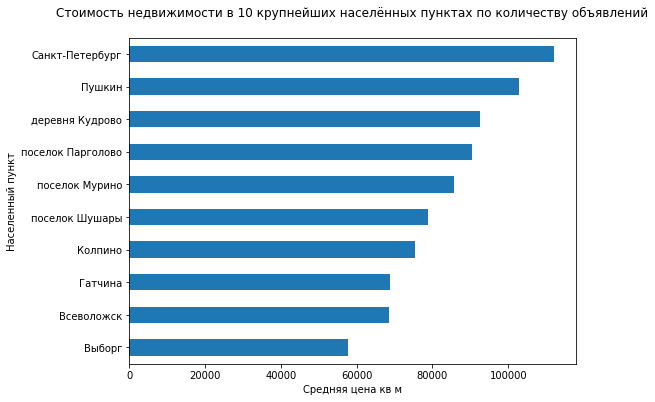

In [80]:


locality_plot = city_sm_price.sort_values('count', ascending=False).head(10).reset_index()

locality_plot.sort_values(by='price_sq_m').plot(x='locality_name', y='price_sq_m', kind='barh', figsize=(8,6), legend=False)
plt.xlabel('Средняя цена кв м')
plt.ylabel('Населенный пункт')
plt.title('Стоимость недвижимости в 10 крупнейших населённых пунктах по количеству объявлений\n')
plt.show()

### Рассчитаем зависимость стоимости объектов от расстояния до центра города.

In [81]:
 data.query('locality_name == "Санкт-Петербург"').pivot_table(index='center_km', values='last_price')


,last_price
center_km,
0,13552.736928
1,12846.507104
2,12026.034370
3,10305.902966
4,11061.970960
5,11178.076932
6,12020.327915
7,10094.867761
8,7944.255872


Чем квартира в объявлении находится ближе к центру, тем цена ее будет выше.

### Общий вывод

В ходе исследования мы провели изучение и обработку данных: 
нашли и изучили пропущенные значения в столбцах, 
устранили некоторые пропуски,
заполнили пропущенные значения там, где это возможно, 
рассмотрели типы данных в столбцах и зпреобразовали их там, где это было необходимо.
Изучили уникальные значения в столбце с названиями населенных пунктов и исправили неявные дубликаты (поменяли ё на е и городской поселок на поселок городского типа).

В итоге нашего исследования можно сделать следующие выводы:
в центре санкт-Петербурга квартиры дороже, чем в других населенных пунктах. 
И чем дальше от центра, тем ниже цена.
Так же общая цена растет на квартиры с большей площадью, а цена квадратного метра выше на квартиры студии. 
Но они быстрее всего продаются. Среднее время продажи 178 дней. Медианное время продажи 94 дня.
Некоторые квартиры продавались сразу после публикации, а некоторые квартиры "висели" в публикации до четырех лет.
Быстрыми продажами можно считать квартиры, которые продавались в течение 45 дней. Медленными - 228 дней. 
В десяти населенных пунктах с наибольшим числом объявлений самый дорогой квадратный метр жилья в Санкт-Петербурге, самый дешевый в Выборге.
Самая высокая стоимость квадратного метра в Зеленогорске, самая низкая в деревне Старополье.


